**Analysing TMDB movie data**

Questions for Analysis:
1. Do movies with high popularity achive high revenvue?
2. What are the most filmed genres in this whole dataset?
3. Is there a correlation between a movie budget and its revenue?

In [47]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/tmdb-movies.csv')

In [49]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

**Data Cleaning**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


In [52]:
#checking for duplicated values
df.duplicated().sum()

1

Result So Far: <br>
1. The dataset consists of a total of 10866 rows and 21 columns.
2. We have only 1 duplicated row which would be droped.
3. Some columns wont be useful in answering our questions using analysis.
4. Few columns have many missing values that needs to be handled.
5. Columns cast director genre have values saperated with a '|'.
7. release_date's data type needs to be casted.
8. We can append a column for the movie profit using formula (profit = revenue - budget).
9. vote_average better be presented as a catecorical variable that groubs multible ratings values.
9. We may also categorize profit column for better EDA.

In [53]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [54]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [55]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [56]:
#drop unnecessory columns
columns_to_drop = ['id', 'imdb_id', 'homepage', 'cast','director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj']
for column in columns_to_drop:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)

In [57]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [58]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [59]:
df.shape

(10865, 10)

In [60]:
#check for null values
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,23
release_date,0
vote_count,0
vote_average,0
release_year,0


In [61]:
# dropping NaNs
df.dropna(inplace = True)
df.isnull().any().sum()

0

In [62]:
#cleaning the genre column
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [63]:
df.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,7.3,2015


In [64]:
#creating new column profit
df['profit'] = df.revenue - df.budget

In [65]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,7.3,2015,1316249360


In [72]:
#Converting columns using a function
def category_col(df, col, labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
  return df

#this function discritzes the column based on quartiles

In [73]:
#converting vote_average into category
labels = ['not_popular', 'below_avg', 'avg', 'popular']
category_col(df, 'vote_average', labels)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,avg,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,popular,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,avg,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,popular,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,popular,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,popular,1966,0
10862,0.065543,0,0,Grand Prix,176,Action,12/21/66,20,below_avg,1966,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,1/1/66,11,avg,1966,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,11/2/66,22,not_popular,1966,0


In [74]:
df['vote_average'].unique()

['avg', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'avg' < 'popular']

NaN value is present. thus it needs to be dropped

In [76]:
df.dropna(inplace = True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
release_date,0
vote_count,0
vote_average,0
release_year,0


In [77]:
df.head(5)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,avg,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,popular,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,avg,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,popular,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,popular,2015,1316249360


In [78]:
#conerting profit into category
labels = ['low_profit', 'avg_profit', 'high_profit']
category_col(df, 'profit', labels)


,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,avg,2015,high_profit
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,popular,2015,high_profit
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,avg,2015,high_profit
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,popular,2015,high_profit
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,popular,2015,high_profit
...,...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Carry On Screaming!,87,Comedy,5/20/66,13,popular,1966,low_profit
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,popular,1966,low_profit
10862,0.065543,0,0,Grand Prix,176,Action,12/21/66,20,below_avg,1966,low_profit
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,1/1/66,11,avg,1966,low_profit


In [79]:
df['profit'].unique()

['high_profit', 'avg_profit', 'low_profit', NaN]
Categories (3, object): ['low_profit' < 'avg_profit' < 'high_profit']

NaN value is present. thus needs to be dropped

In [80]:
df.dropna(inplace = True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
release_date,0
vote_count,0
vote_average,0
release_year,0


In [81]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,avg,2015,high_profit
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,popular,2015,high_profit
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,avg,2015,high_profit
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,popular,2015,high_profit
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,popular,2015,high_profit


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10864
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   release_date    10839 non-null  object  
 7   vote_count      10839 non-null  int64   
 8   vote_average    10839 non-null  category
 9   release_year    10839 non-null  int64   
 10  profit          10839 non-null  category
dtypes: category(2), float64(1), int64(5), object(3)
memory usage: 1.1+ MB


**Exploratory Data Analysis**

In [88]:
#Q1. Do movies with high popularity achive high revenue?
df['popularity'].mean()
# 0.647

less_popular = df.query('popularity <= 0.647')
more_popular = df.query('popularity > 0.647')

print(less_popular.revenue.mean(),more_popular.revenue.mean())

7689823.871224779 121933819.08567691


Conclusion: it's very clear that more popular movies recieve way more revenue than the less popular movies.

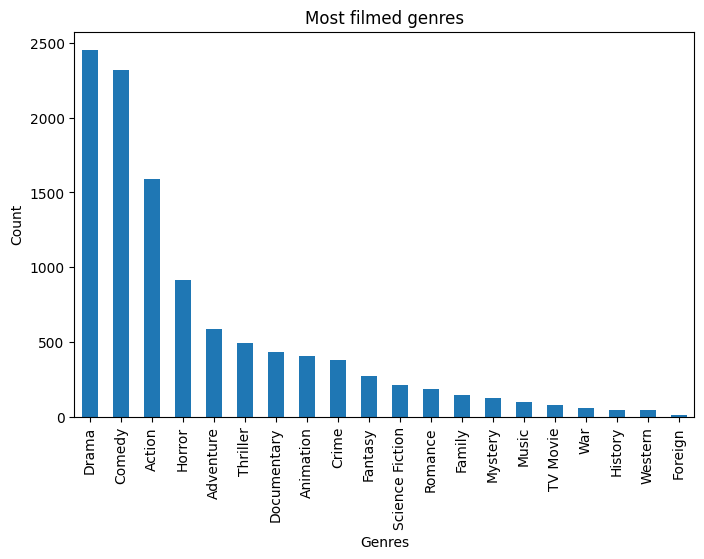

In [89]:
#Q2. What are the most filmed genres in this whole dataset?
plt.figure(figsize=(8,5))
df['genres'].value_counts().plot(kind='bar')
plt.title('Most filmed genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

From the above graph, we can see that Drama, Comedy and Action are the most three filmed genres in total of 10839 movies in our dataset, and that Drama genre is filmed 22.6% of the times on our dataset.

Text(0.5, 1.0, 'Movie Budeget vs Revenue')

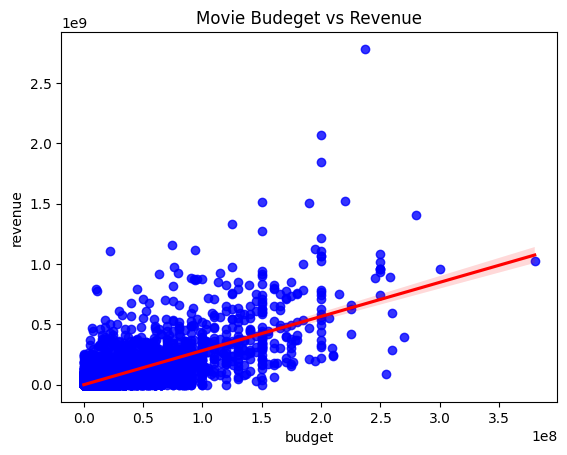

In [90]:
#Q3. Is there a correlation between a movie budget and its revenue?
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'color':'blue' }, line_kws={'color':'red'}).set_title('Movie Budeget vs Revenue')

There is positive correlation between budget and revenue, indecating a relation between them with little outliers.